# Try RandomForestRegressor with grid of various parameters

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv')

In [3]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'DIABETES_3Y_Change_Percentage'
])

numerical_features = list(
    set(training_data.columns) - non_numerical_features - target_features
)

In [4]:
features = training_data[numerical_features]
labels = training_data['DIABETES_3Y_Change_Percentage']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

In [6]:
regr = RandomForestRegressor(max_depth=60, n_estimators=1000, max_features = 1, random_state=15, n_jobs=16)

In [7]:
history = regr.fit(X_train, Y_train)

Train R2 score is 0.89263
Test R2 score is 0.23842


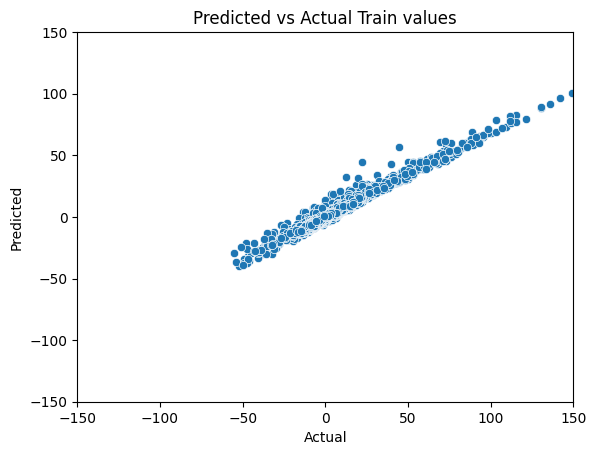

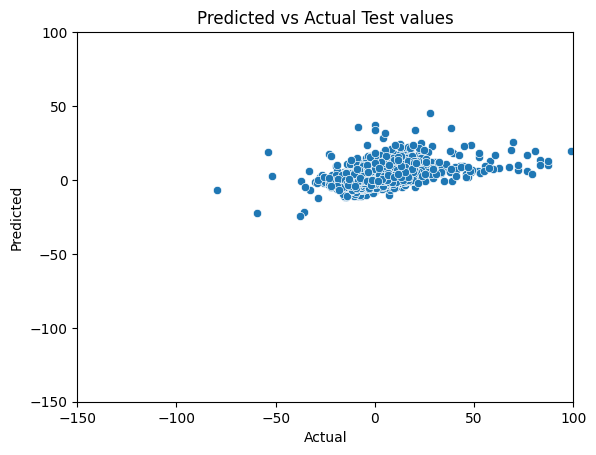

In [12]:
%run -i ./Model_Eval.ipynb
evaluate_regression_model(
    regr,
    None,
    X_train,
    Y_train,
    X_test,
    Y_test
)

In [13]:
regr.feature_importances_

array([0.02490056, 0.02883063, 0.01871427, 0.02624513, 0.02218258,
       0.02563275, 0.02254056, 0.02726702, 0.02347164, 0.02470038,
       0.02331039, 0.02750243, 0.02158197, 0.02478772, 0.02083963,
       0.02334067, 0.02009228, 0.02417699, 0.02269532, 0.02842434,
       0.02061955, 0.02147968, 0.02242208, 0.02151008, 0.02739546,
       0.02079015, 0.0206134 , 0.02422313, 0.02636169, 0.0208981 ,
       0.02826447, 0.02251245, 0.02297615, 0.0247662 , 0.02313731,
       0.02302091, 0.02400929, 0.02742586, 0.02555399, 0.02325112,
       0.02277545, 0.02475622])

In [10]:
# plt.figure(figsize=(15,10))
# plt.barh(numerical_features, regr.feature_importances_)